# 1. Preferential Attachment

In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import powerlaw
from scipy.stats import poisson

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
N_values = [50, 100, 500, 1000, 5000]

barabasi_graphs = [nx.barabasi_albert_graph(n, m=3, seed=42) for n in N_values]
randomized_graphs = [
    nx.random_reference(g, connectivity=False, seed=42) for g in barabasi_graphs
]

## 1.1

In [3]:
avg_clust = [nx.average_clustering(g) for g in barabasi_graphs]
avg_clust_rand = [nx.average_clustering(g) for g in randomized_graphs]

assortativity = [nx.degree_assortativity_coefficient(g) for g in barabasi_graphs]
assortativity_rand = [nx.degree_assortativity_coefficient(g) for g in randomized_graphs]

avg_shortest_path = [nx.average_shortest_path_length(g) for g in barabasi_graphs]
avg_shortest_path_rand = [nx.average_shortest_path_length(g) for g in randomized_graphs]

dia = [nx.diameter(g) for g in barabasi_graphs]
dia_rand = [nx.diameter(g) for g in randomized_graphs]

## 1.2

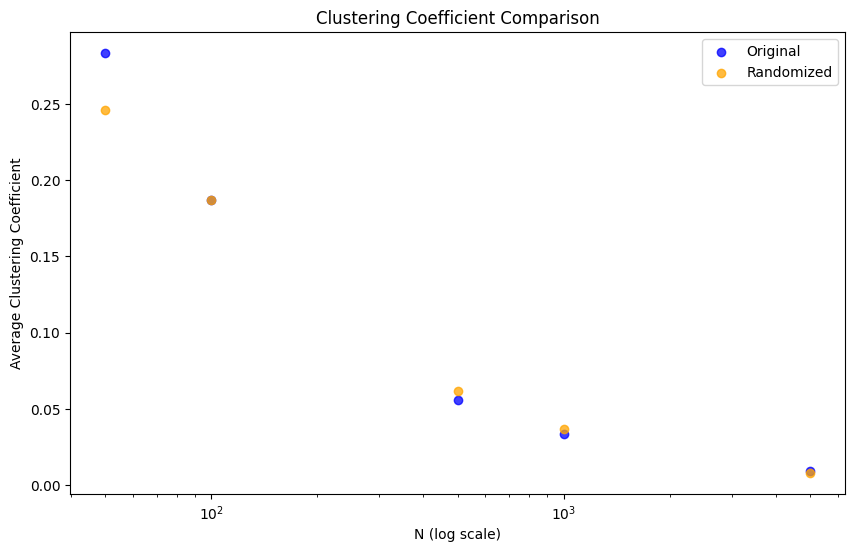

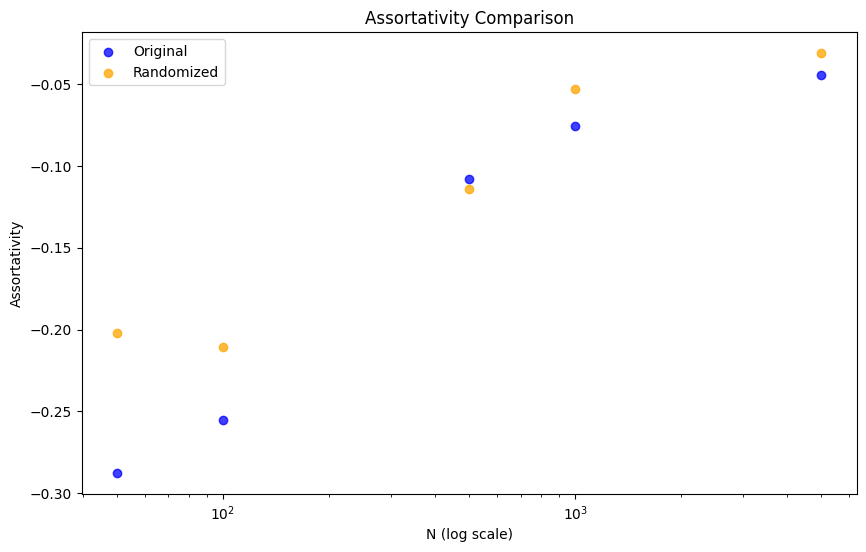

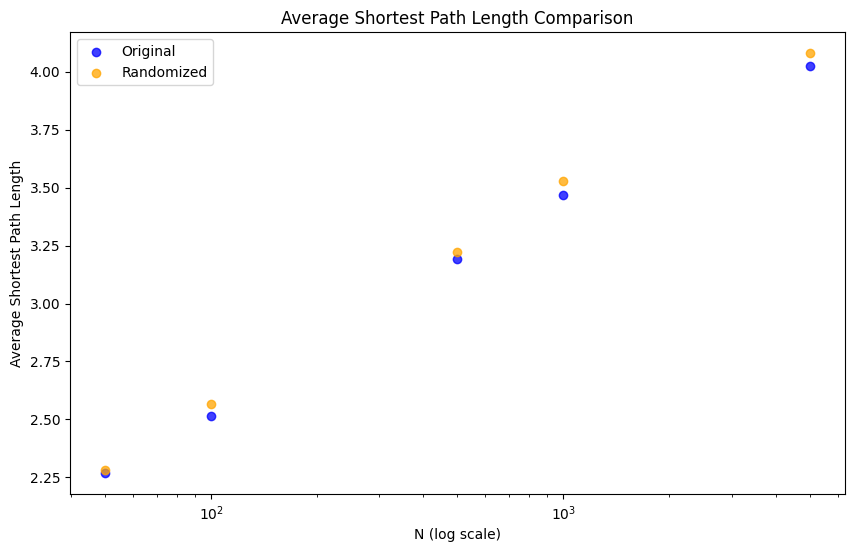

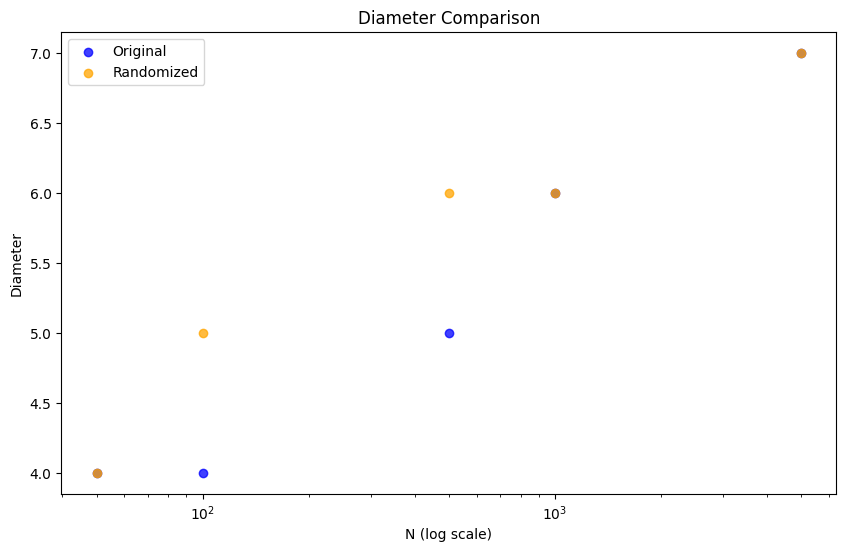

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(N_values, avg_clust, label="Original", color="blue", alpha=0.75)
plt.scatter(N_values, avg_clust_rand, label="Randomized", color="orange", alpha=0.75)
plt.xscale("log")
plt.xlabel("N (log scale)")
plt.ylabel("Average Clustering Coefficient")
plt.legend()
plt.title("Clustering Coefficient Comparison")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(N_values, assortativity, label="Original", color="blue", alpha=0.75)
plt.scatter(
    N_values, assortativity_rand, label="Randomized", color="orange", alpha=0.75
)
plt.xscale("log")
plt.xlabel("N (log scale)")
plt.ylabel("Assortativity")
plt.legend()
plt.title("Assortativity Comparison")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(N_values, avg_shortest_path, label="Original", color="blue", alpha=0.75)
plt.scatter(
    N_values, avg_shortest_path_rand, label="Randomized", color="orange", alpha=0.75
)
plt.xscale("log")
plt.xlabel("N (log scale)")
plt.ylabel("Average Shortest Path Length")
plt.legend()
plt.title("Average Shortest Path Length Comparison")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(N_values, dia, label="Original", color="blue", alpha=0.75)
plt.scatter(N_values, dia_rand, label="Randomized", color="orange", alpha=0.75)
plt.xscale("log")
plt.xlabel("N (log scale)")
plt.ylabel("Diameter")
plt.legend()
plt.title("Diameter Comparison")
plt.show()

## 1.3

TODO: add 3. (1 point) Which measures are relatively unchanged by randomization? Why?

# 2 Scale-free Distribution

In [5]:
gml_files = [f for f in os.listdir("datasets/") if f.endswith(".gml")]

graphs = {
    path.split(".")[0]: nx.read_gml(os.path.join("datasets/", path))
    for path in gml_files
}

## 2.1

In [6]:
degrees = {}
gamma_values = {}
errors = {}

for name, g in graphs.items():
    d = [degree for node, degree in g.degree()]
    degrees[name] = d
    fit = powerlaw.Fit(d, discrete=True)

    gamma = fit.power_law.alpha
    gamma_error = fit.power_law.sigma

    gamma_values[name] = gamma
    errors[name] = gamma_error

for name, g in graphs.items():
    print("\n")
    print(f"{name} Network")
    print("Gamma: ", gamma_values[name])
    print("Error: ", errors[name])

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
xmin progress: 99%

Macaque Network
Gamma:  5.771172341306776
Error:  0.6886594089008911


Actors Network
Gamma:  2.126849196646938
Error:  0.0028982213836374767


Internet Network
Gamma:  1.9157988569314632
Error:  0.013180032052154154


Flavor Network
Gamma:  5.659919105036032
Error:  0.2527195962133422


## 2.2

/var/folders/zd/5rj11nhj5h98j5kmp_lp5k5w0000gn/T/ipykernel_74721/126474760.py:44: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, max(degrees[name])*1.5)


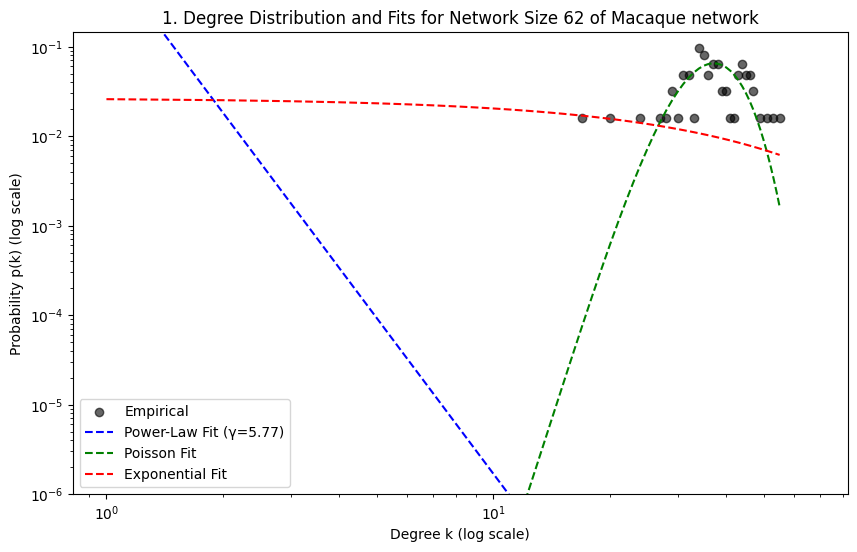

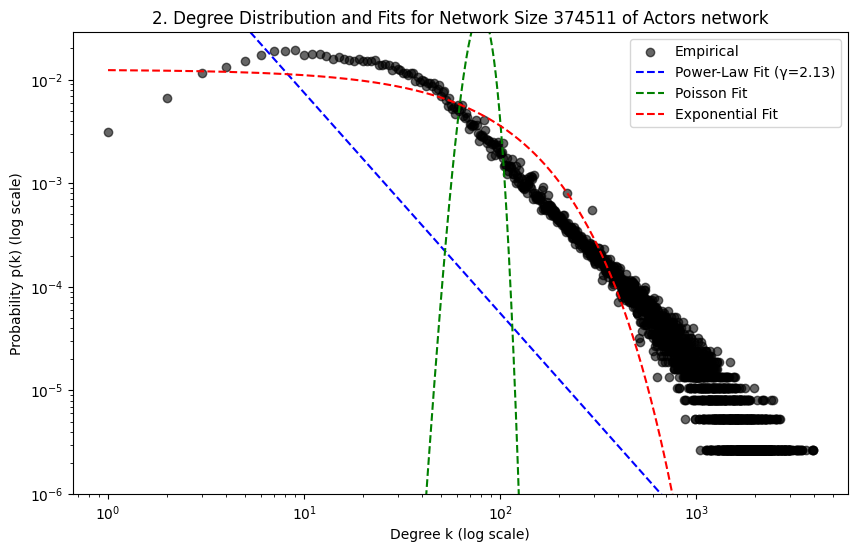

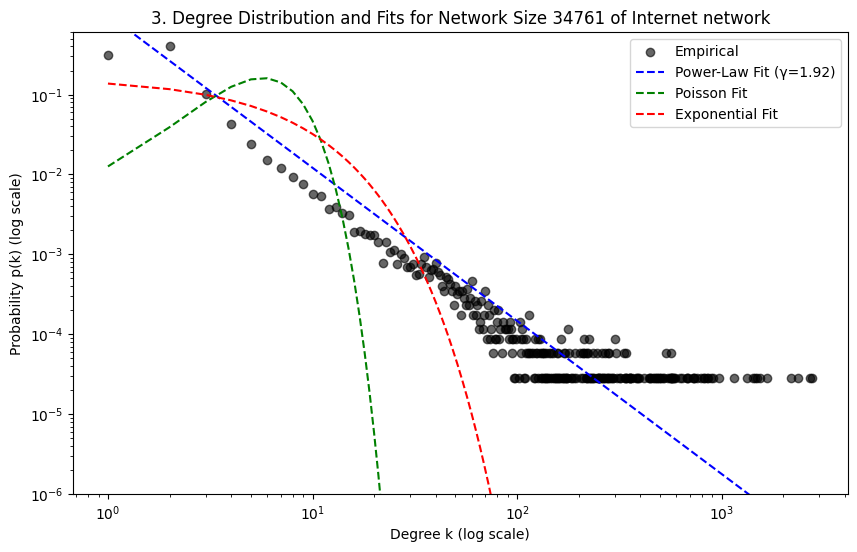

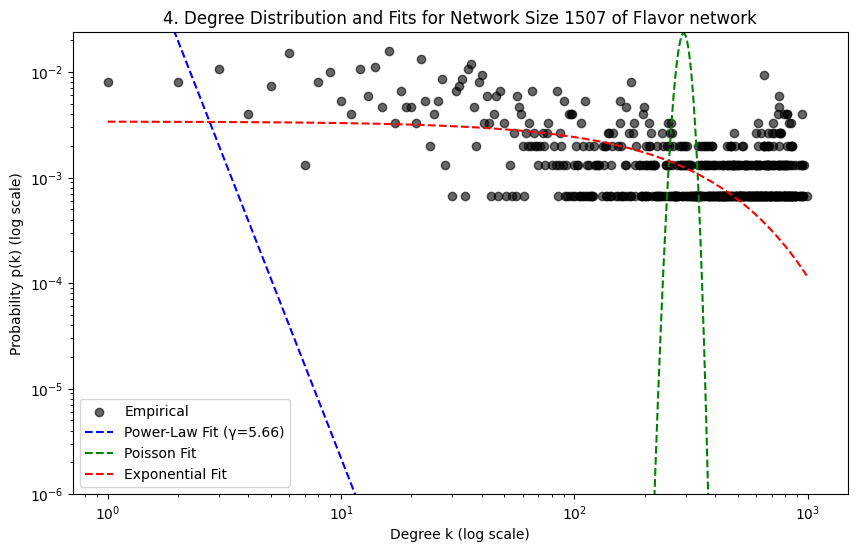

In [7]:
i = 1
for name, g in graphs.items():
    degree_counts = np.bincount(degrees[name])
    degree_probabilities = degree_counts / len(degrees[name])

    gamma = gamma_values[name]

    lambda_k = np.mean(degrees[name])

    k_values = np.arange(
        1, len(degree_counts)
    )  # Start from 1 to avoid division by zero

    power_law_fit = k_values ** (-gamma)

    poisson_fit = poisson.pmf(k_values, lambda_k)
    # poisson_fit = lambda_k ** k_values / factorial(k_values) * np.exp(-lambda_k)

    exponential_fit = (1 / lambda_k) * np.exp(-k_values / lambda_k)

    plt.figure(figsize=(10, 6))

    plt.scatter(
        k_values, degree_probabilities[1:], color="black", label="Empirical", alpha=0.6
    )

    plt.plot(
        k_values,
        power_law_fit,
        color="blue",
        linestyle="--",
        label=f"Power-Law Fit (γ={gamma:.2f})",
    )

    plt.plot(k_values, poisson_fit, color="green", linestyle="--", label="Poisson Fit")

    plt.plot(
        k_values, exponential_fit, color="red", linestyle="--", label="Exponential Fit"
    )

    plt.xscale("log")
    plt.yscale("log")

    plt.xlim(0, max(degrees[name])*1.5)
    plt.ylim(1e-6, max(degree_probabilities) * 1.5)

    plt.xlabel("Degree k (log scale)")
    plt.ylabel("Probability p(k) (log scale)")
    plt.title(
        f"{i}. Degree Distribution and Fits for Network Size {len(g.nodes())} of {name} network"
    )
    plt.legend()
    plt.show()
    i += 1

TODO: add Which distribution is more likely to describe the data?

## 2.3

TODO: add 3. (1 point) Based on the previous plot, say whether the network under consideration is scale‑free or not.